In [1]:
include("../encoding.jl")
function save(fig, savename)
    savefig(fig, savename*".png")
    savefig(fig, savename*".svg")
    savefig(fig, savename*".pdf")
end

save (generic function with 1 method)

In [2]:
using Plots
using LaTeXStrings

In [9]:
l,D=0.3,20_000
bipolar=true
encoder = realvalue_encoder(l,D, bipolar=bipolar);

x = range(0,1,length=200);
ϕx = encode(encoder, x, normalized=false);
Δx = encode(encoder, x, normalized=true);
nx = encoder.normalization.(x);

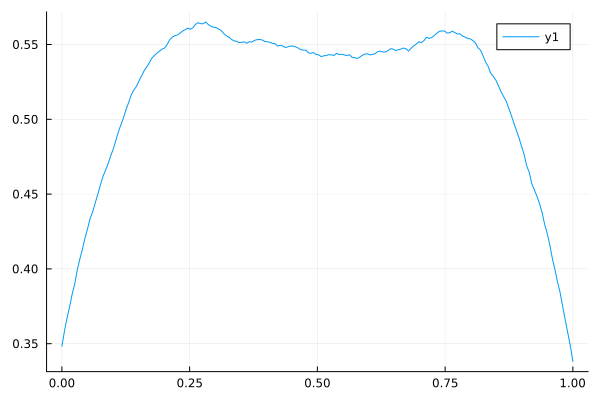

In [10]:
plot(x, nx)

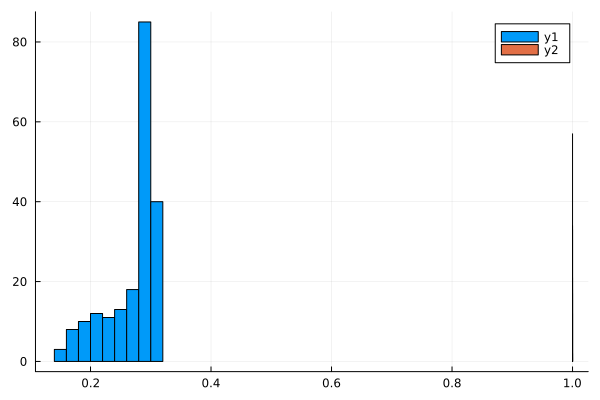

In [11]:
histogram(mean(ϕx*ϕx'/D, dims=1)[:])
histogram!(mean(Δx*Δx'/D, dims=1)[:])

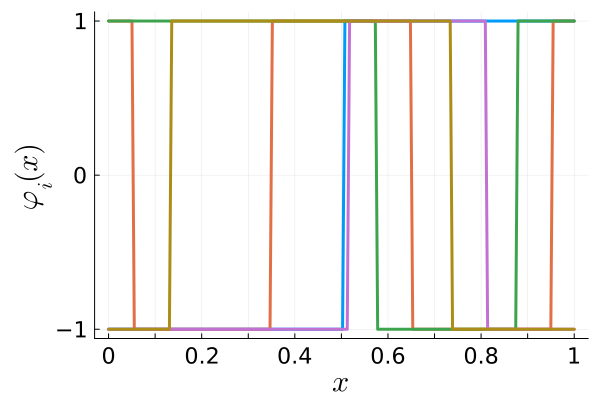

In [12]:
xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [-1,0,1];
pl = plot(x, ϕx[:,1:5], linewidth=3)
plot!(legend=false, xticks=(xvalues,xmarks), yticks=yvalues, xlabel=L"x", ylabel=L"$\varphi_i(x)$")
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)

save(pl, "phi_bipolar"*string(bipolar))
pl

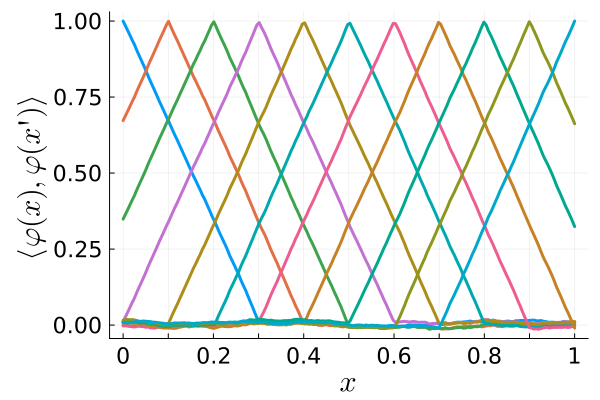

In [13]:
pl = plot(x, (encode(encoder, xvalues, normalized=false)*ϕx'/D)', linewidth=3)
plot!(legend=false, xticks=(xvalues, xmarks), xlabel=L"x", ylabel=L"$\langle \varphi(x), \varphi(x') \rangle$")
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)

save(pl, "phixphi_bipolar"*string(bipolar))
pl

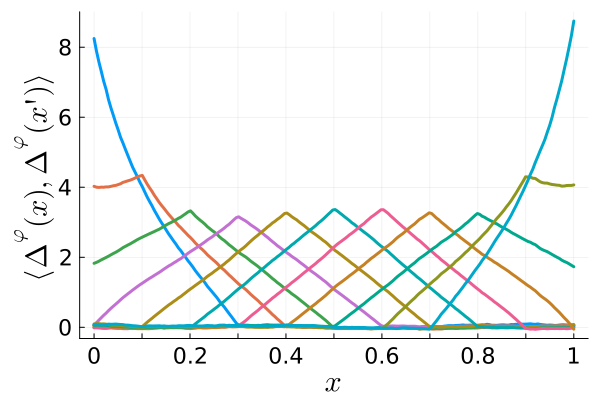

In [14]:
pl = plot(x, (encode(encoder, xvalues, normalized=true)*Δx'/D)', linewidth=3)
plot!(legend=false, xticks=(xvalues, xmarks), xlabel=L"x", ylabel=L"$\langle \Delta^{\varphi}(x), \Delta^{\varphi}(x') \rangle$")
plot!(guidefontsize=20, tickfontsize=15, left_margin = 5Plots.mm)

save(pl, "DeltaxDelta_bipolar"*string(bipolar))
pl